This aux file trains a binary classification model for categorizing images between Product or not_product.
Very simple and could probably be improved

Only need to run it once

Results: - binary_accuracy: 0.9703 - false_negatives: 21.0280 - loss: 0.0760 - val_binary_accuracy: 0.8375 - val_false_negatives: 8.0000 - val_loss: 0.6672


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

2025-01-23 18:26:03.294965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 18:26:03.310260: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-23 18:26:03.314665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 18:26:03.326645: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = '../02-data/02-classifier/train'
valid_dir = '../02-data/02-classifier/valid'
test_dir = '../02-data/02-classifier/test'
# Define parameters
batch_size = 16
epochs = 10
img_height, img_width = 150,150
lr = 1e-3

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(train_dir,
                                          target_size=(img_height, img_width),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(test_dir,
                                      target_size = (img_height, img_width),
                                      batch_size = batch_size,
                                      class_mode = 'binary')

Found 1650 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'Product': 0, 'not_product': 1}

In [5]:
from tensorflow.keras import Input

model = keras.Sequential()

model.add(Input(shape=(img_height, img_width, 3)))  # Define input shape explicitly here

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

/home/pablo/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1737653183.723156   46521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737653183.811643   46521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737653183.811862   46521 cuda_e

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)

In [7]:
#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,
         steps_per_epoch = 250,
         epochs = epochs,
         validation_data = test_dataset
         )

/home/pablo/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1737653243.670383   46651 service.cc:146] XLA service 0x7fdcf0005590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737653243.670404   46651 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-01-23 18:27:23.709433: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-23 18:27:23.914124: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100


  2/250 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - binary_accuracy: 0.6562 - false_negatives: 8.5000 - loss: 0.9256 

2025-01-23 18:27:28.745967: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1737653248.752303   46651 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 48/250 ━━━━━━━━━━━━━━━━━━━━ 53s 264ms/step - binary_accuracy: 0.6174 - false_negatives: 55.6042 - loss: 0.7049

2025-01-23 18:27:41.114479: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads



104/250 ━━━━━━━━━━━━━━━━━━━━ 34s 239ms/step - binary_accuracy: 0.6712 - false_negatives: 132.3365 - loss: 0.6280

2025-01-23 18:27:53.345795: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-23 18:27:53.345930: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/pablo/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - binary_accuracy: 0.7125 - false_negatives: 210.3960 - loss: 0.5751 - val_binary_accuracy: 0.7750 - val_false_negatives: 15.0000 - val_loss: 0.5238
Epoch 2/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - binary_accuracy: 0.8166 - false_negatives: 99.0769 - loss: 0.4156

2025-01-23 18:28:06.302606: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-01-23 18:28:06.302717: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869
2025-01-23 18:28:06.302797: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14702555755538723782


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - binary_accuracy: 0.8144 - false_negatives: 160.9360 - loss: 0.4143 - val_binary_accuracy: 0.8000 - val_false_negatives: 13.0000 - val_loss: 0.4270
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - binary_accuracy: 0.8312 - false_negatives: 170.9800 - loss: 0.3854 - val_binary_accuracy: 0.7875 - val_false_negatives: 16.0000 - val_loss: 0.4875
Epoch 4/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - binary_accuracy: 0.8525 - false_negatives: 96.9712 - loss: 0.3463

2025-01-23 18:28:25.157275: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2025-01-23 18:28:25.157307: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - binary_accuracy: 0.8541 - false_negatives: 150.1320 - loss: 0.3384 - val_binary_accuracy: 0.8125 - val_false_negatives: 13.0000 - val_loss: 0.4266
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - binary_accuracy: 0.8995 - false_negatives: 84.9720 - loss: 0.2520 - val_binary_accuracy: 0.7625 - val_false_negatives: 6.0000 - val_loss: 0.4305
Epoch 6/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - binary_accuracy: 0.9122 - false_negatives: 40.3077 - loss: 0.2048

2025-01-23 18:28:43.946142: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - binary_accuracy: 0.9217 - false_negatives: 58.2320 - loss: 0.1940 - val_binary_accuracy: 0.8500 - val_false_negatives: 6.0000 - val_loss: 0.4955
Epoch 7/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - binary_accuracy: 0.9378 - false_negatives: 25.5096 - loss: 0.1643

2025-01-23 18:28:53.759224: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869
2025-01-23 18:28:53.759324: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14702555755538723782


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - binary_accuracy: 0.9469 - false_negatives: 36.3080 - loss: 0.1437 - val_binary_accuracy: 0.8375 - val_false_negatives: 7.0000 - val_loss: 0.5283
Epoch 8/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - binary_accuracy: 0.9612 - false_negatives: 14.2885 - loss: 0.0954

2025-01-23 18:29:03.535013: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2025-01-23 18:29:03.535064: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - binary_accuracy: 0.9587 - false_negatives: 25.2160 - loss: 0.1062 - val_binary_accuracy: 0.8000 - val_false_negatives: 12.0000 - val_loss: 0.7945
Epoch 9/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - binary_accuracy: 0.9427 - false_negatives: 29.7019 - loss: 0.1541

2025-01-23 18:29:14.158265: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869
2025-01-23 18:29:14.158298: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14702555755538723782


250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - binary_accuracy: 0.9486 - false_negatives: 40.9720 - loss: 0.1361 - val_binary_accuracy: 0.8750 - val_false_negatives: 8.0000 - val_loss: 0.7836
Epoch 10/10
104/250 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - binary_accuracy: 0.9729 - false_negatives: 12.6442 - loss: 0.0712

2025-01-23 18:29:24.533727: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 954397444337374869


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - binary_accuracy: 0.9703 - false_negatives: 21.0280 - loss: 0.0760 - val_binary_accuracy: 0.8375 - val_false_negatives: 8.0000 - val_loss: 0.6672


In [14]:
def predictImage(filename):
    # Load and preprocess the image
    img1 = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img1)

    # Convert image to array and add batch dimension
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)

    # Make prediction
    val = model.predict(X)[0][0]  # Get the scalar value from the output
    print(val)

    # Interpret the prediction based on a threshold (e.g., 0.5)
    if val >= 0.5:
        plt.xlabel("Not_Product", fontsize=30)
    else:
        plt.xlabel("Product", fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1.0


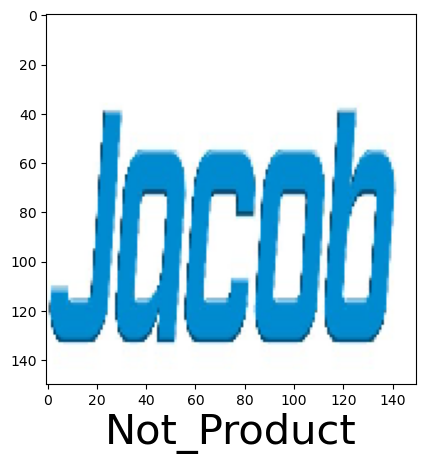

In [20]:
predictImage("/media/pablo/windows_files/00 - Master/05 - Research&Thesis/R2-Research_Internship_2/02-data/txts/accessories/2xx_M/2xx_M_page2_img4.jpeg")

In [22]:
# Save the model to a file
model.save("../02-data/02-classifier/model.keras")  # Save as HDF5 format
